In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

"C:\\Users\\Chandana's Pc"

In [3]:
data=pd.read_csv("bank-marketing.csv")
data.head(10)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,100000,married,tertiary,yes,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,100000,single,tertiary,no,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,120000,divorced,tertiary,no,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,55000,married,primary,yes,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,60000,single,secondary,yes,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [21]:
data.shape

(45211, 19)

In [19]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [63]:
data.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [23]:
data.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


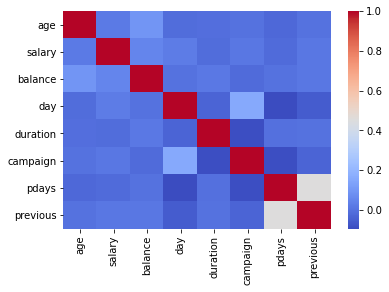

In [5]:
sns.heatmap(data.corr(),cmap='coolwarm')

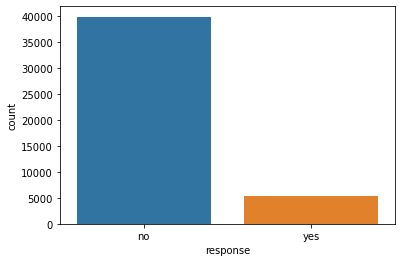

In [24]:
sns.countplot(x='response',data=data,label=True)

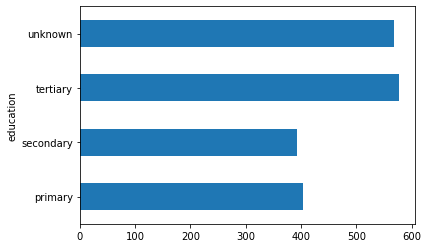

In [24]:
data.groupby(['education'])['balance'].median().plot.barh()

In [4]:
data.drop(data[data['pdays'] < 0].index,inplace=True) 

In [31]:
data.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

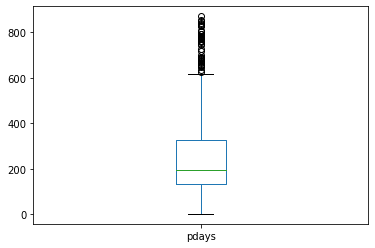

In [27]:
data.pdays.plot.box()

In [14]:
response=pd.get_dummies(data['response'],drop_first=True)
data=pd.concat([data,response],axis=1)
data.drop(['response'],axis=1)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,yes
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [15]:
data.head(2)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,yes
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0


In [5]:
data.drop(['response'],axis=1)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success


In [32]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [7]:
X = data.drop(columns=['job','marital','education','targeted','default','housing','loan','contact','month','poutcome','response'])

In [8]:
X.head()

,age,salary,balance,day,duration,campaign,pdays,previous
24060,33,50000,882,21,39,1,151,3
24062,42,50000,-247,21,519,1,166,1
24064,33,70000,3444,21,144,1,91,4
24072,36,100000,2415,22,73,1,86,4
24077,36,100000,0,23,140,1,143,3


In [9]:
y= data['response']
y.head()


24060     no
24062    yes
24064    yes
24072     no
24077    yes
Name: response, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
X_train.head(5)

,age,salary,balance,day,duration,campaign,pdays,previous
39948,54,100000,446,2,122,2,91,8
40076,43,100000,2987,4,156,1,85,3
44526,35,60000,7050,11,222,3,182,4
40492,69,55000,473,7,112,1,78,1
27668,53,60000,173,21,412,2,143,1


In [13]:
y_train.head(5)

39948     no
40076    yes
44526    yes
40492     no
27668     no
Name: response, dtype: object

In [14]:
from sklearn.linear_model import LogisticRegression


In [54]:
logmodel=LogisticRegression()

In [55]:
logmodel.fit(X_train,y_train)

D:\ASSIGNMENT\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
predictions

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [58]:
logmodel.predict_proba(X_test)

array([[0.85284901, 0.14715099],
       [0.68275613, 0.31724387],
       [0.71444819, 0.28555181],
       ...,
       [0.87748658, 0.12251342],
       [0.92606884, 0.07393116],
       [0.74731379, 0.25268621]])

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [60]:
accuracy_score(y_test,predictions)

0.7828894269572235

In [66]:
confusion_matrix(y_test,predictions)

array([[1839,   76],
       [ 462,  101]], dtype=int64)

In [71]:
## RFE

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(logmodel, 5)
rfe.fit(X_train,y_train)

D:\ASSIGNMENT\anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
D:\ASSIGNMENT\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ASSIGNMENT\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [72]:
rfe.support_

array([ True, False, False,  True,  True,  True, False,  True])

In [73]:
X_train.columns[rfe.support_]

Index(['age', 'day', 'duration', 'campaign', 'previous'], dtype='object')

In [74]:
cols = X_train.columns[rfe.support_]

In [75]:
logmodel.fit(X_train[cols],y_train)

LogisticRegression()

In [76]:
y_pred2 = logmodel.predict(X_test[cols])

In [78]:
confusion_matrix(y_pred2,y_test)

array([[1854,  479],
       [  61,   84]], dtype=int64)

# Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)


In [81]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [85]:
from sklearn.model_selection import cross_val_score
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.7824894021779836

In [86]:
y_pred1 = rfc.predict(X_test)


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

          no       0.80      0.98      0.88      1915
         yes       0.76      0.17      0.27       563

    accuracy                           0.80      2478
   macro avg       0.78      0.58      0.58      2478
weighted avg       0.79      0.80      0.74      2478



In [89]:
confusion_matrix(y_test,y_pred1)

array([[1886,   29],
       [ 470,   93]], dtype=int64)